## Notes

KK asked to get all previous sales information for a condo building at 19051 COLLINS AVE in Miami-Dade County. The data had to be purchased for $50 from the property appraiser's website. The transaction was completed on Jan. 23, 2024

## Imports

In [33]:
import pandas as pd
import datetime
import re
import numpy as np
import os

## PD Set Options

In [2]:
pd.set_option('display.max_columns',None)

## Data Read in

In [3]:
df = pd.read_csv('Public Sales Extract AllYears.csv', dtype='str')

In [4]:
zoning_codes = pd.read_excel('public+files+codes+2023_11 (1).xlsx','Zoning codes',dtype='str')

## Data work

In [5]:
df.columns

Index(['Folio', 'Municipality', 'SaleID', 'OR_BK', 'OR_PG', 'TransferCode',
       'Grantor(seller)', 'Grantee(buyer)', 'DateOfSale', 'Price', 'VI',
       'QU_FLG', 'DORCode', 'SiteAddress', 'StreetNumber', 'StreetPrefix',
       'StreetName', 'StreetNumberSuffix', 'StreetSuffix', 'StreetDirection',
       'CondoUnit', 'SiteCity', 'SiteZip', 'MailingAddressLine1',
       'MailingAddressLine2', 'MailingAddressLine3', 'City', 'State', 'Zip',
       'Country', 'SalesCode', 'Owner1', 'Owner2', 'Owner3', 'Zoning',
       'AdjustedSqFt', 'LotSF', 'Acres', 'Bedrooms', 'Baths', '1/2 Baths',
       'LivingUnits', 'Stories', 'NumberOfBuilding', 'YearBuilt',
       'EffectiveYearBuilt', 'LivingSqFt', 'ActualSqFt'],
      dtype='object')

 Folio: 31-2202-016-0001

In [6]:
partial_folio = '312202016'
filtered_df = df[df['Folio'].str.startswith(partial_folio)]
filtered_df.to_csv('19051_COLLINS_AVE_all_sales.csv')

In [7]:
print(len(filtered_df['CondoUnit'].unique()))
filtered_df['CondoUnit'].unique()

108


array(['E101', 'E201', 'E102', 'E202', 'E103', 'E203', 'E104', 'E204',
       'E105', 'E205', 'E106', 'E206', 'E107', 'E207', 'E108', 'E208',
       'E109', 'E209', 'E110', 'E210', 'E111', 'E211', 'E112', 'E212',
       'E113', 'E213', 'E114', 'E214', 'E115', nan, 'E116', 'E216',
       'E117', 'E217', 'E118', 'E218', 'E119', 'E219', 'E120', 'E220',
       'E121', 'E221', 'E122', 'E222', 'E123', 'E223', 'E124', 'E224',
       'E125', 'E225', 'E126', 'E226', 'D101', 'D201', 'D102', 'D202',
       'D103', 'D203', 'D104', 'D204', 'D105', 'D205', 'D106', 'D206',
       'D107', 'D207', 'D108', 'D208', 'D109', 'D209', 'D110', 'D210',
       'D111', 'D211', 'D112', 'D212', 'D113', 'D213', 'D114', 'D214',
       'D115', 'D215', 'D116', 'D216', 'D117', 'D217', 'D118', 'D218',
       'D119', 'D219', 'D120', 'D220', 'D121', 'D221', 'D122', 'D222',
       'D123', 'D223', 'D124', 'D224', 'D125', 'D225', 'D126', 'D226',
       'C1', 'C2', 'C3', 'C4'], dtype=object)

In [8]:
filtered_df['DateOfSale'] = pd.to_datetime(filtered_df['DateOfSale'])

/var/folders/rq/0_j_rksd7psgdycg9c1qwf6m0000gp/T/ipykernel_49280/262731260.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  filtered_df['DateOfSale'] = pd.to_datetime(filtered_df['DateOfSale'])
/var/folders/rq/0_j_rksd7psgdycg9c1qwf6m0000gp/T/ipykernel_49280/262731260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['DateOfSale'] = pd.to_datetime(filtered_df['DateOfSale'])


In [9]:
final_df = filtered_df.sort_values(by='DateOfSale').groupby('CondoUnit', as_index=False).last()

In [10]:
final_df.to_csv('19051_COLLINS_AVE_most_recent_sales_by_unit.csv')

## Other data story ideas

In [11]:
# df[df['Zoning'] == '9000']
# df['DateOfSale'] = pd.to_datetime(df['DateOfSale'])

In [12]:
# Parse the 'DateOfSale' column as datetime
df['DateOfSale'] = pd.to_datetime(df['DateOfSale'], format='%m/%d/%Y %I:%M:%S %p')

# If you just want the date part and are okay with it being a datetime object (time is 00:00:00)
df['DateOfSale'] = df['DateOfSale'].dt.date

In [13]:
df['DateOfSale'] = pd.to_datetime(df['DateOfSale'])

In [14]:
df['YearOfSale'] = df['DateOfSale'].dt.year

In [15]:
df = df[df['YearOfSale'] > 1989]

In [16]:
# df[['YearOfSale','Zoning']].value_counts().head(60)

In [17]:
df = df.merge(zoning_codes, how='inner',left_on='Zoning',right_on='Zone')

In [18]:
grouped_data = df.groupby(['YearOfSale', 'Description']).size().reset_index(name='SalesCount')

In [19]:
pivot_data = grouped_data.pivot(index='YearOfSale', columns='Description', values='SalesCount').fillna(0)

In [20]:
pivot_data

Description,AGRICULTURE,BUNGALOW COURTS,CEN HIGH DNSTY BORDERS CB,CEN-PEDESTRIAN ORIENTATIO,CIVIC/GOV'T,CLUSTER HOUSE - 5-10 ACRE,COMM/RESIDENTIAL-DESIGN D,COMMERCIAL,COMMERCIAL - ARTERIAL,COMMERCIAL - CENTRAL,COMMERCIAL - CLASSIFIED,COMMERCIAL - GENERAL,COMMERCIAL - LIBERAL,COMMERCIAL - MIXED USE ENTERTAINMENT,COMMERCIAL - NEIGHBORHOOD,COMMERCIAL - PROFESS OFFI,COMMERCIAL - RESTRICTED,COMMERCIAL - SHOPPING CEN,COMMUNITY FACILITIES,DKUC CENTER DRI SUB DISTR,DKUC CENTER SUB DISTRICT,DKUC CORE SUB DISTRICT,DKUC EDGE SUB DISTRICT,DUPLEXES - <1200 SQFT/BLD,DUPLEXES - >1200 SQFT/BLD,DUPLEXES - GENERAL,ESTATES - 1 ACRE,ESTATES - 15000 SQFT LOT,ESTATES - 2-1/2 ACRES,ESTATES - 25000 SQFT LOT,ESTATES - 5 ACRES,ESTATES - GENERAL,"ESTATES IR - 10,000 Sqft Lot",GENERAL URBAN 36 U/A LIMITED,GENERAL USE,GOLF COURSE & COUNTRY CLU,HIGH DENSITY MIX USE,HOSPITALS,HOTELS & MOTELS - GENERAL,HOTELS & MOTELS - GENERAL High Density,HOTELS & MOTELS - GENERAL Med Density,"HOTELS, MOTELS & CLINICS",INDUSTRIAL,INDUSTRIAL - GENERAL,INDUSTRIAL - HEAVY MFG,INDUSTRIAL - INDUSTRIAL P,INDUSTRIAL - LIGHT MFG,INDUSTRIAL - MEDIUM MFG,INDUSTRIAL - RESTRICTED,INTENSIVE USE,INTERIM-AWAIT SPECIFIC ZO,LANDFILL,LIBERAL BUSINESS EXTENSIV,MARINE ACTIVITY RELATED,MH-1,MISC. ZONING,MIXED-USE,MIXED-USE 2,MIXED-USE 3,MODIFIED SINGLE FAM RES,MULTI-FAM PLANNED RES,MULTI-FAMILY,MULTI-FAMILY - 1 STORY,MULTI-FAMILY - 10-12 UNIT,MULTI-FAMILY - 10-21 U/A,MULTI-FAMILY - 101+ U/A,MULTI-FAMILY - 12 STORY &,MULTI-FAMILY - 14-16 UNIT,MULTI-FAMILY - 18-20 UNIT,MULTI-FAMILY - 2 STORY,MULTI-FAMILY - 22-28 UNIT,MULTI-FAMILY - 22-37 U/A,MULTI-FAMILY - 24 STORY &,MULTI-FAMILY - 3 STORY,MULTI-FAMILY - 36 STORY &,MULTI-FAMILY - 38-62 U/A,MULTI-FAMILY - 4 STORY,MULTI-FAMILY - 4 UNITS,MULTI-FAMILY - 5 STORY &,MULTI-FAMILY - 6-8 UNITS,MULTI-FAMILY - 63-100 U/A,MULTI-FAMILY - 8 STORY &,MULTI-FAMILY - CO-OPS,MULTI-FAMILY - CONDOMINUM,MULTI-FAMILY - GENERAL,MULTI-FAMILY 3,MULTI-FAMILY 4,MULTI-FAMILY MED DENSITY,"MULTI-FAMILY, PDR DISTRICT, DESIGNED FOR NCON","MULTI-FAMILY, PLANNED RESIDENTIAL DEVELOPEMENT DIS",NEIGHBORHOOD-ARTERIAL,OFF-STREET PARKING,OFFICE DIST - LTD COMMERCIAL - 12 STORY MAX,OFFICE DIST - LTD COMMERCIAL - 6 STORY MAX,OFFICE PARK DISTRICT,OTHER PUBLIC FACILITIES,PARKS & OPEN SPACE DIST,PARKS & RECREATION,PLAN UNIT DEVEL - >7500 S,PLAN UNIT DEVEL - DUPLEXE,PLAN UNIT DEVL - >80000 S,PLANNED AREA DEVELOPEMENT - EMPLOYMENT CENTER,PLANNED AREA DEVELOPMENT,PLANNED RESIDENTIAL OFFIC,PLANNED UNIT DEVELOPMENT,PLANNED UNIT DEVELOPMENT - MIXED USE,PRESERVATION,RAPID TRANSIT-HIGH DENSIT,RECREATIONAL,RES / COMMERCIAL 2 STORY,RESIDENTIAL - PLANNED UNI,RESIDENTIAL-LIBERAL RETAI,RESIDENTIAL-LIMITED RETAI,RESIDENTIAL-MEDIUM RETAIL,SCHOOLS & CHURCHES,SEMI PROFESSIONAL OFFICE,SGL FAMILY - 1201-1400 SQ,SGL FAMILY - 1551-1700 SQ,SGL FAMILY - 1701-1900 SQ,SGL FAMILY - 1901-2100 SQ,SGL FAMILY - 2101-2300 SQ,SGL FAMILY - 2301-2500 SQ,SGL FAMILY - 2501-2800 SQ,SGL FAMILY - 2801-3000 SQ,SGL FAMILY - 3001-3250 SQ,SGL FAMILY - 3501-4000 SQ,SGL FAMILY - 4001 SQFT &,SGL FAMILY - 901-1200 SQF,SINGLE FAM - ANCILIARY UNIT,SINGLE FAMILY,SINGLE FAMILY - 500-750 S,SINGLE FAMILY - 751-900 S,SINGLE FAMILY - GENERAL,"SINGLE FAMILY,1401-1550 S",SPECIAL USE,SPECIFIC NO-COMP/QUALIFY,TOWN CENTER,TOWNHOUSE,TRADITIONAL NBHD DISTRICT,TRAILER PARKS,TRANSIT ORIENTED DEVELOPEMENT DIST,UC CENTER - ARTS DISTRICT (AD) 4 MAX HT,UC CENTER - INDUSTRIAL (ID) 12 MAX HT,UC CENTER - INDUSTRIAL (ID) 4 MAX HT,UC CENTER - INDUSTRIAL (ID) 6 MAX HT,UC CENTER - INSTITUTIONAL (I) 4 MAX HT,UC CENTER - MAIN STREET (MM) 12 MAX HT,UC CENTER - MAIN STREET (MM) 4 MAX HT,UC CENTER - MAIN STREET (MM) 6 MAX HT,UC CENTER - MARKET DISTRICT (MD) 6 MAX HT,UC CENTER - MIXED USE CORR/IND (MCI) 4 MAX HT,UC CENTER - MIXED USE CORR/IND (MCI) 6 MAX HT,UC CENTER - MIXED USE CORRIDOR (MC) 12 MAX HT,UC CENTER - MIXED USE CORRIDOR (MC) 2 MAX HT,UC CENTER - MIXED USE CORRIDOR (MC) 4 MAX HT,UC CENTER - MIXED USE CORRIDOR (MC) 6 MAX HT,UC CENTER - MIXED USE CORRIDOR (MC) 

/var/folders/rq/0_j_rksd7psgdycg9c1qwf6m0000gp/T/ipykernel_49280/2888207720.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


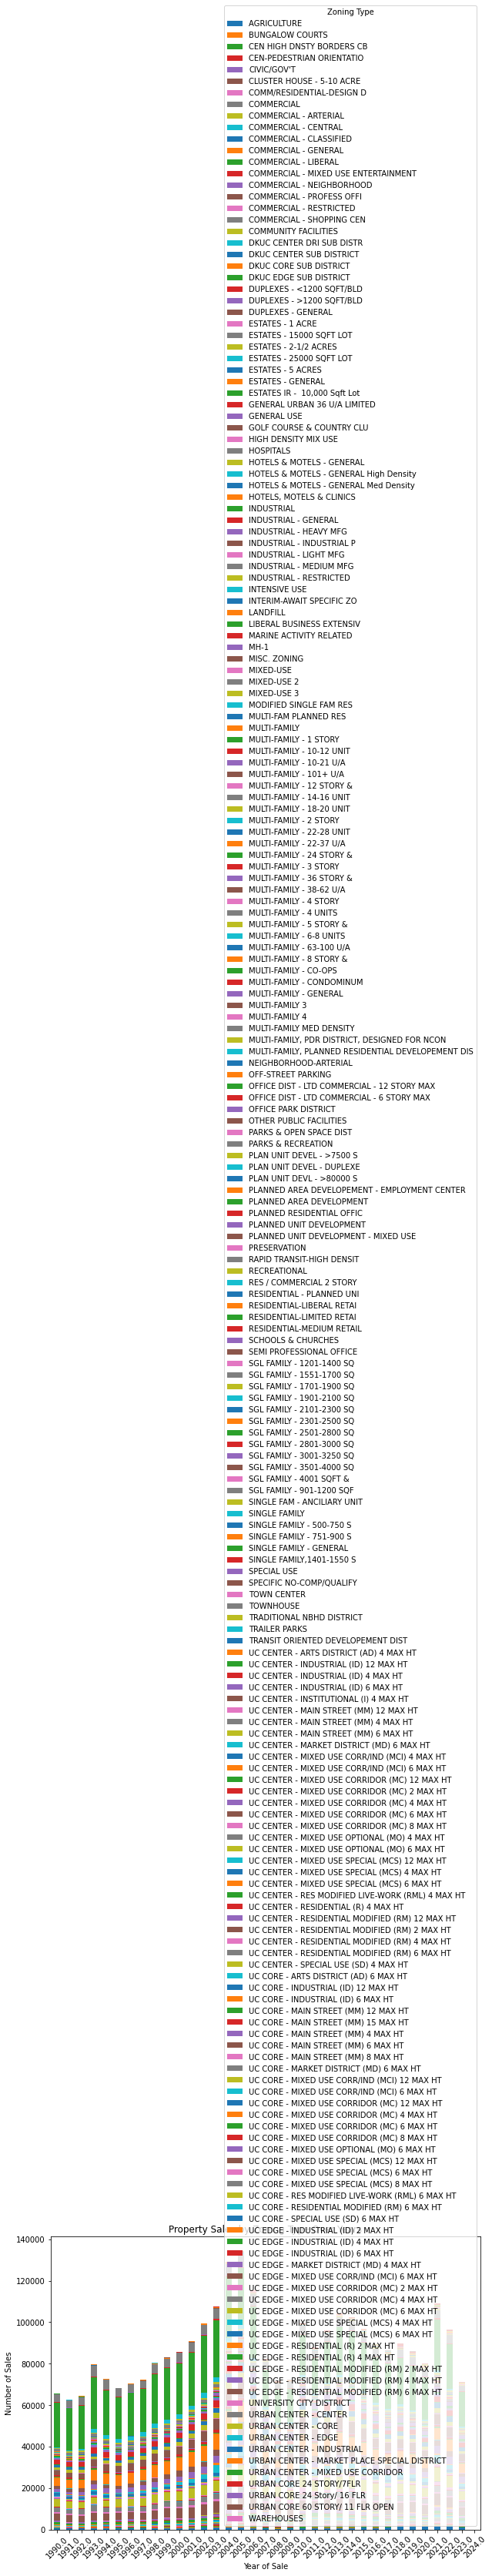

In [21]:
import matplotlib.pyplot as plt

pivot_data.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Property Sales by Zoning Type Over Years')
plt.xlabel('Year of Sale')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.legend(title='Zoning Type')
plt.tight_layout()
plt.show()

In [22]:
pivot_data_reset = pivot_data.reset_index()
pivot_data_reset = pivot_data_reset.copy()

In [36]:
import plotly.express as px

# Ensure pivot_data_reset is the DataFrame with 'YearOfSale' as a column
fig = px.bar(pivot_data_reset, x='YearOfSale', y=[col for col in pivot_data_reset.columns if col != 'YearOfSale'],
             title='Miami-Dade County Property Sales (units sold) by Zoning Type Over Years')

fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.write_html('index.html')
fig.show()

/Users/afarence/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1222: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/afarence/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1222: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/afarence/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1222: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

## Zoning Class increase

In [24]:
df['Price'] = df['Price'].astype(int)

In [25]:
# Aggregate data: count sales and calculate average sale price
aggregated_data = df.groupby(['YearOfSale', 'Description']).agg(
    SalesCount=('Price', 'size'),  # Count sales
    AvgPrice=('Price', 'mean')  # Calculate average price
).reset_index()

# Identify zones with 10,000 or more sales in any year
qualified_zones = aggregated_data[aggregated_data['SalesCount'] >= 5000]['Description'].unique()

In [26]:
df_filtered = df[df['Description'].isin(qualified_zones)]

# Assuming 'Price' is your column with the sale prices
yearly_avg_price_filtered = df_filtered.groupby(['YearOfSale', 'Description'])['Price'].mean().reset_index(name='AvgPrice')

In [27]:
# Check for duplicates
duplicates = yearly_avg_price_filtered.duplicated(subset=['YearOfSale', 'Description'], keep=False)
if duplicates.any():
    print("Duplicates found. Need to aggregate before pivoting.")
    # Aggregate to ensure uniqueness
    yearly_avg_price_filtered = yearly_avg_price_filtered.groupby(['YearOfSale', 'Description']).mean().reset_index()


In [28]:
# Pivot the data
pivot_avg_price_filtered = yearly_avg_price_filtered.pivot(index='Description', columns='YearOfSale', values='AvgPrice')

# Calculate the percentage change year over year
percent_change_filtered = pivot_avg_price_filtered.pct_change(axis='columns') * 100

/var/folders/rq/0_j_rksd7psgdycg9c1qwf6m0000gp/T/ipykernel_49280/2119583582.py:5: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



In [29]:
percent_change_filtered.replace([np.inf, -np.inf], np.nan, inplace=True)

In [30]:
percent_change_filtered

YearOfSale,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0
Description,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DUPLEXES - GENERAL,NaN,2953.851640,-96.661432,99.604409,18.829831,52.270240,-63.042462,18.691639,143.469134,-8.007286,-44.914287,-0.393403,20.848680,189.257479,-37.872717,329.905329,-71.597883,-25.695721,-43.589482,-24.163320,-3.426842,23.696195,0.996922,27.429876,10.039206,60.875127,-27.134490,26.483759,26.190273,9.415263,19.508094,50.086540,-22.073761,-8.043991,0.000000
HOTELS & MOTELS - GENERAL,NaN,-15.413478,-15.336296,75.154151,-28.229168,211.894313,-68.810948,6.398634,60.526833,-11.976083,-10.887718,46.539768,-10.440286,2.938409,158.110522,867.528368,-93.250761,22.041566,-25.720281,-14.648844,197.062049,-62.468112,-21.932760,21.174950,1530.206810,-92.094174,160.052944,-46.140582,10.389315,-34.996266,62.104283,8.140702,19.504880,-15.962451,534.610320
MULTI-FAMILY - 101+ U/A,NaN,-79.753829,83.510250,-24.302448,-29.794810,8.770727,45.928377,18.752079,-20.486229,-12.614142,27.162483,10.913188,11.959898,0.180129,106.088480,2315.343585,-97.616841,91.440961,-20.589144,-0.367752,71.661296,-61.854577,34.614824,26.885389,-17.177387,55.961420,-7.171464,-45.578268,-3.964584,68.908612,-22.863547,83.737865,1.843425,-12.015030,0.000000
MULTI-FAMILY - 22-37 U/A,NaN,-24.308471,13.263941,81.637789,-37.853700,31.568043,-14.413403,23.594610,-10.977160,248.920037,-71.723229,259.237724,-63.975765,9.143117,8701.254213,-87.862800,-82.719640,-6.679521,-50.605984,-12.874097,186.656137,-65.936634,70.079013,-24.197960,-4.527690,38.320959,10.217956,-0.056355,136.520411,-59.190379,1007.164823,-70.297381,-1.863591,222.424390,0.000000
MULTI-FAMILY - 38-62 U/A,NaN,-16.053067,18.714162,141.904707,-43.243872,36.055224,-23.664060,1.415046,22.766293,17.168222,-6.309217,18.135249,39.269873,-13.202611,3188.911572,-61.578945,-63.801830,-65.972808,-35.221002,-14.463741,224.430473,-73.573301,15.174767,65.404225,-17.902986,301.014949,-70.805592,9.470102,3.182058,69.503956,-40.505628,155.036108,-29.175656,-20.276684,2480.720442
SINGLE FAMILY - GENERAL,NaN,-22.539565,19.486803,10.113728,-11.912299,38.010848,-20.757121,114.820271,-57.836811,21.347694,0.149036,60.967829,-6.357596,-16.158661,84.921593,-17.436203,23.188792,-30.878596,-38.354511,-6.748903,12.506139,11.286232,13.063379,19.549882,2.690338,-0.622328,5.340748,39.474924,10.421361,-25.641168,22.641294,41.353736,-3.466910,-3.078628,863.979507
TOWNHOUSE,NaN,-40.602554,38.025116,99.914048,20.084096,-50.886262,-12.887768,106.089106,-39.513079,-34.861729,29.376318,23.074879,151.775056,-36.806747,46.248228,235.888207,-33.951289,-54.168898,-54.289518,-10.580292,284.013191,-64.619794,32.152764,135.175416,-71.353893,4.489984,45.351843,-23.151872,4.405309,47.775107,299.679670,-69.487768,160.473004,-71.118905,-100.000000


<Axes: title={'center': 'Percent Change in Average Sale Price in 2018 for Qualified Zones'}, xlabel='Description'>

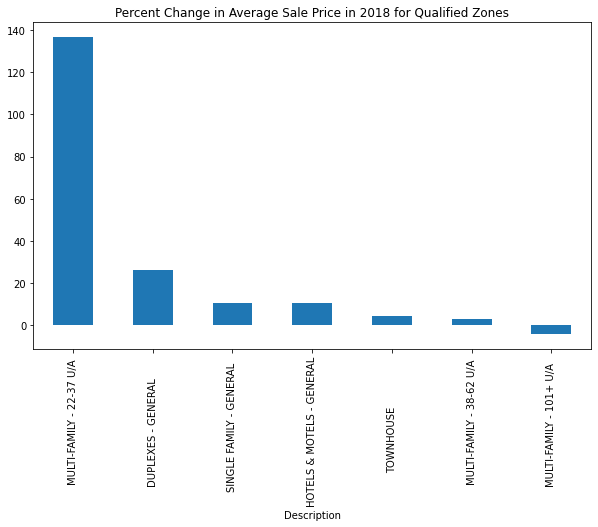

In [31]:
# Example: Visualizing the result for a specific year's percent change
year_column = 2018  # Example year
percent_change_filtered[year_column].sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), title=f'Percent Change in Average Sale Price in {year_column} for Qualified Zones')

## Image Snagger

In [34]:
base_name = 'https://trd-digital.github.io/trd-news-interactive-maps/'

cwd = os.getcwd()

cwd = cwd.split('/')

final_name = base_name + cwd[-1]
print(final_name)

https://trd-digital.github.io/trd-news-interactive-maps/Miami-Dade_Property_Appraiser
